In [1]:
import models.shallow_NN as shallow_NN
import os
import torch
import matplotlib.pyplot as plt

In [2]:
def get_out_weights(results_path, model_path, input_dim, channels, output_dim, num_hidden):
    net = shallow_NN(input_dim, channels, num_hidden, output_dim)
    
    best_model = torch.load(model_path)
    best_results = torch.load(results_path)
    
    net.load_state_dict(best_model['model_state_dict'])
    net_out_weights = net.linear2.weight.detach()
    
    pns=best_results['act']['pns']
    final_pns = pns[-2][0]
    max_pn = torch.max(final_pns, dim=0)[0]
    act_neurons = final_pns > 0.0001*max_pn
    
    return net_out_weights.T[act_neurons]

In [47]:
def plot_nacts(results_path, title):
    results = torch.load(results_path)
    nacts = results['act']['nact']
    nacts = [nact[0].cpu() for nact in nacts]
    plt.plot(nacts[:-1])
    plt.title(title)
    return nacts

In [63]:
def plot_out_sparsity(results_path, title):
    results = torch.load(results_path)
    out_sparse = results['act']['out_sparse']
    out_sparse = [out_spas.cpu() for out_spas in out_sparse]
    plt.plot(out_sparse[:-1])
    return out_sparse

In [23]:
w2v1_results_PATH = 'results/MNIST_subset_shallow_NN/0620113547_pn_w2v1_loss_{0.001}_{0.1}_balance/result.pt'
w2v1_model_PATH = 'results/MNIST_subset_shallow_NN/0620113547_pn_w2v1_loss_{0.001}_{0.1}_balance/model_idx_5000_acc_84_7_sp_302.pt'
w2v1_out_weights = get_out_weights(w2v1_results_PATH, w2v1_model_PATH, 28, 1, 10, 1000)
w2v1_out_weights[w2v1_out_weights < 1e-4] = 0
for weight in w2v1_out_weights:
    print(weight, '\n')

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1780, 0.0000, 0.0000,
        0.0000]) 

tensor([0.0000, 0.0000, 0.0000, 0.3914, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000]) 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0042, 0.0000,
        0.0000]) 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4193,
        0.0000]) 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.4663]) 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1325, 0.0000,
        0.0000]) 

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]) 

tensor([0.0000, 0.2079, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000]) 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1043, 0.0000, 0.0000, 0.0000,
        0.0000]) 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0003, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000]) 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0002, 0.0000, 0.

In [24]:
w2v2_results_PATH = 'results/MNIST_subset_shallow_NN/0620113548_pn_w2v2_loss_{0.001}_{0.1}_balance/result.pt'
w2v2_model_PATH = 'results/MNIST_subset_shallow_NN/0620113548_pn_w2v2_loss_{0.001}_{0.1}_balance/model_idx_5000_acc_87_34_sp_520.pt'
w2v2_out_weights = get_out_weights(w2v2_results_PATH, w2v2_model_PATH, 28, 1, 10, 1000)
w2v2_out_weights[w2v2_out_weights < 1e-4] = 0
for weight in w2v2_out_weights:
    print(weight, '\n')

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.1975]) 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0035, 0.0000, 0.0000, 0.0000, 0.0242,
        0.0097]) 

tensor([0.0000, 0.0000, 0.0000, 0.0723, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000]) 

tensor([0.0000, 0.0000, 0.0000, 0.0013, 0.0014, 0.0010, 0.0002, 0.0000, 0.0000,
        0.0035]) 

tensor([0.0000, 0.0000, 0.0068, 0.0000, 0.0012, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0116]) 

tensor([0.0000, 0.0000, 0.0019, 0.0165, 0.0000, 0.0038, 0.0000, 0.0000, 0.0000,
        0.0000]) 

tensor([0.0224, 0.0108, 0.0000, 0.0212, 0.0000, 0.0000, 0.0041, 0.0016, 0.0000,
        0.0422]) 

tensor([0.0013, 0.0019, 0.0064, 0.0000, 0.0159, 0.0000, 0.0009, 0.0000, 0.0000,
        0.0000]) 

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]) 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0002, 0.0000,
        0.0000]) 

tensor([0.0000, 0.0000, 0.0000, 0.0001, 0.0000, 0.0000, 0.

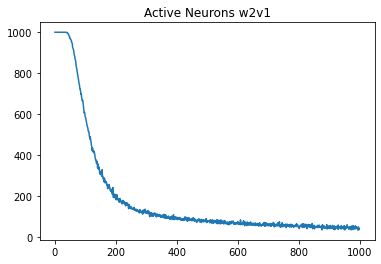

In [48]:
title = 'Active Neurons w2v1'
nacts_w2v1=plot_nacts(w2v1_results_PATH, title)

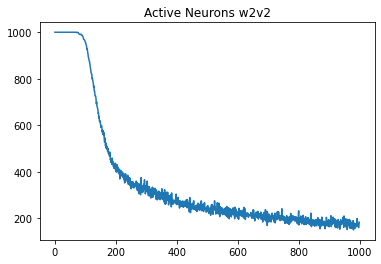

In [49]:
title = 'Active Neurons w2v2'
nacts_w2v2=plot_nacts(w2v2_results_PATH, title)

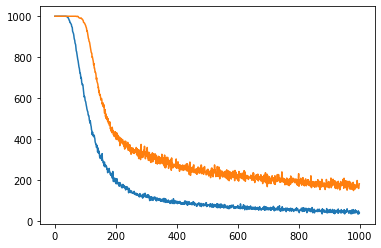

In [52]:
plt.plot(nacts_w2v1[:-1])
plt.plot(nacts_w2v2[:-1])
plt.show()

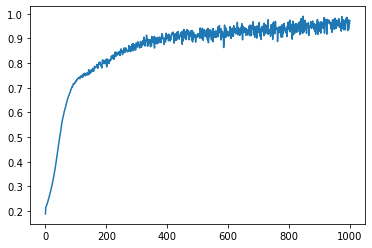

In [64]:
out_sparse_w2v1 = plot_out_sparsity(w2v1_results_PATH, 'Out Sparse w2v1')

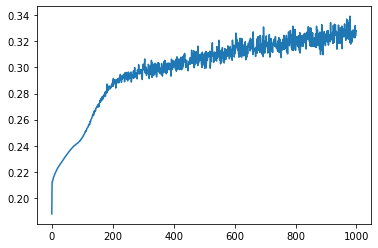

In [65]:
out_sparse_w2v2 = plot_out_sparsity(w2v2_results_PATH, 'Out Sparse w2v2')

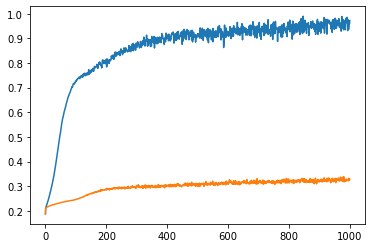

In [67]:
plt.plot(out_sparse_w2v1[:-1])
plt.plot(out_sparse_w2v2[:-1])
plt.show()